In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import pandas_datareader.data as web # p importar dados do yahoo

!pip install yfinance --upgrade --no-cache-dir # para puxar dados do yahoo
import yfinance as yf
yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [ ]:
#load the data
'''#da para escolher o arquivo
from google.colab import files
uploaded = files.upload()
appl = pd.read_csv('AAPL.csv')
'''

ibov = web.get_data_yahoo('ABEV3.SA',start ='2017-05-03')
#ibov.reset_index(drop=True, inplace=True)

[*********************100%***********************]  1 of 1 completed


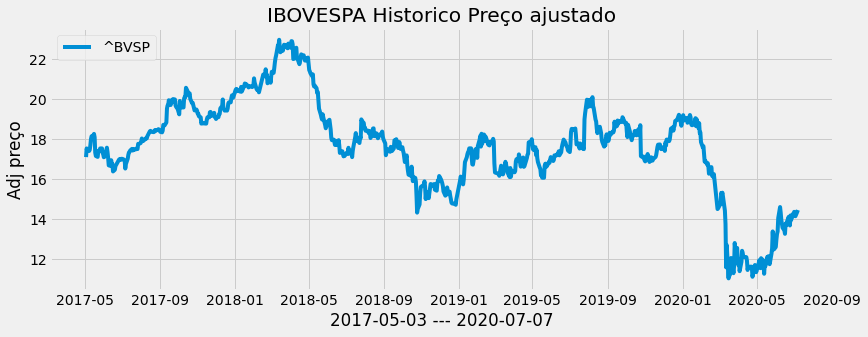

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(ibov['Adj Close'], label = '^BVSP')
plt.title('IBOVESPA Historico Preço ajustado')
plt.xlabel('2017-05-03 --- 2020-07-07')
plt.ylabel('Adj preço')
plt.legend(loc='upper left')
plt.show()

In [ ]:
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = ibov['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
Date,
2017-05-03,NaN
2017-05-04,NaN
2017-05-05,NaN
2017-05-08,NaN
2017-05-09,NaN
...,...
2020-07-01,13.417667
2020-07-02,13.485333
2020-07-03,13.560667


In [ ]:
SMA100 = pd.DataFrame()
SMA100['Adj Close'] = ibov['Adj Close'].rolling(window = 100).mean()
SMA100

,Adj Close
Date,
2017-05-03,NaN
2017-05-04,NaN
2017-05-05,NaN
2017-05-08,NaN
2017-05-09,NaN
...,...
2020-07-01,13.2532
2020-07-02,13.2184
2020-07-03,13.1873


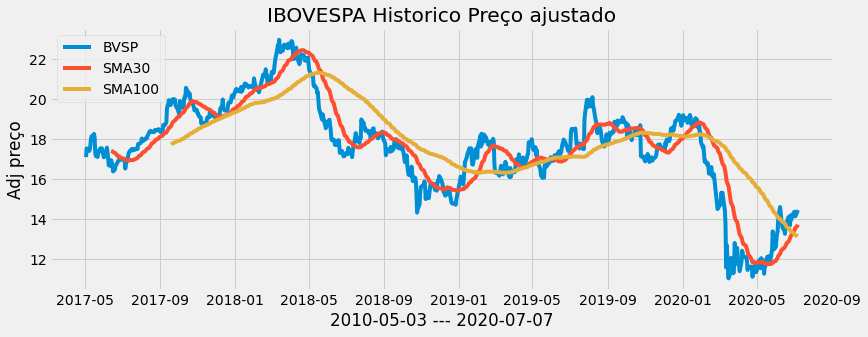

In [ ]:
plt.figure(figsize=(12.5,4.5))
plt.plot(ibov['Adj Close'], label = 'BVSP')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title('IBOVESPA Historico Preço ajustado')
plt.xlabel('2010-05-03 --- 2020-07-07')
plt.ylabel('Adj preço')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#criando um dataframe Para conter TUDO
data = pd.DataFrame()
data['ibov']= ibov['Adj Close']
data['SMA30']= SMA30['Adj Close']
data['SMA100']= SMA100['Adj Close']
data

,ibov,SMA30,SMA100
Date,,,
2017-05-03,17.102104,NaN,NaN
2017-05-04,17.535185,NaN,NaN
2017-05-05,17.415396,NaN,NaN
2017-05-08,17.406181,NaN,NaN
2017-05-09,17.461470,NaN,NaN
...,...,...,...
2020-07-01,14.360000,13.417667,13.2532
2020-07-02,14.170000,13.485333,13.2184
2020-07-03,14.140000,13.560667,13.1873


In [ ]:
data = data.dropna()
data

,ibov,SMA30,SMA100
Date,,,
2017-09-19,19.893526,18.685970,17.730389
2017-09-20,19.967894,18.749803,17.759047
2017-09-21,19.856342,18.810537,17.782259
2017-09-22,20.005079,18.872511,17.808156
2017-09-25,19.986486,18.927977,17.833959
...,...,...,...
2020-07-01,14.360000,13.417667,13.253200
2020-07-02,14.170000,13.485333,13.218400
2020-07-03,14.140000,13.560667,13.187300


In [143]:
#Criando a função para emitir o sinal de Crompra e Venda
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #diz Se ta comprado ou vendido

  for i in range(len(data)):          #for do tamanho de data
    if data['SMA30'][i] > data['SMA100'][i]: #Se sma30>sma100
      if flag != 1:             #testa se ja esta comprado
        sigPriceBuy.append(data['ibov'][i]) #preco compra[i] pega preco ibov
        sigPriceSell.append(np.nan)         #ou seja o preço p venda = nada
        flag = 1                            #para dizer q esta comprado
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
        ########     ########   ##########
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['ibov'][i])
        flag = 0 
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
        ########     ########   ##########
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)


  return (sigPriceBuy, sigPriceSell)
    

In [145]:
#add dados de compra e venda em data
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]
data
buy_sell

TypeError: ignored

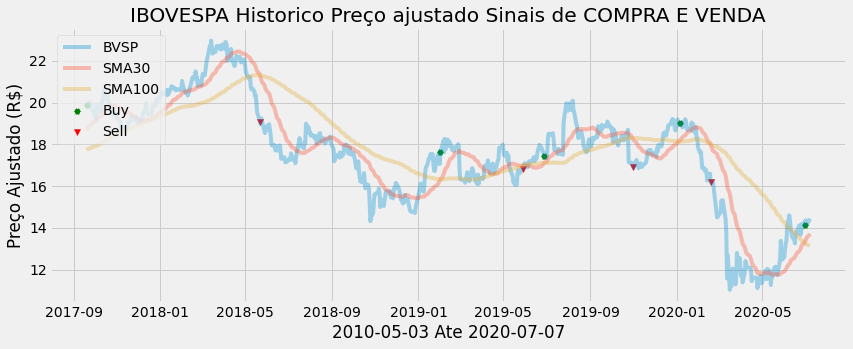

In [ ]:
plt.figure(figsize=(12.7,4.7))

plt.plot(data['ibov'], label = 'BVSP', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30',alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100',alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker="1",color = 'green') #plt scatter(x,y,label,color)
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell',marker="v",color = 'red')

plt.title('IBOVESPA Historico Preço ajustado Sinais de COMPRA E VENDA')
plt.xlabel('2010-05-03 Ate 2020-07-07')
plt.ylabel('Preço Ajustado (R$)')
plt.legend(loc='upper left')
plt.show()